# Malignant vs All

## Importing libraries

In [1]:
# Importing required libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

## Uploading file

In [2]:
# Read in data and display first 5 rows
df = pd.read_csv (r'/content/clinical_data.csv')
df.head()

,Patient ID,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,Subject_Tag,binary_case1,binary_case2
0,P0215,L,NE,30.0,F,35.0,1.42,17.357667,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
1,P0216,L,NE,55.0,M,49.0,1.57,19.879103,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M
2,P0218,L,BE,51.0,F,45.0,1.53,19.223376,Yes,No,No,No,No,0,0,NV,S,Malignant,M,M
3,P0221,L,E,32.0,F,47.0,1.52,20.342798,Yes,No,No,No,No,1,1,NV,S,Malignant,M,M
4,P0222,M,E,46.0,M,59.0,1.68,20.904195,Yes,No,No,No,Yes,2,2,NV,S,Malignant,M,M


## Label Encoding

In [3]:
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['Socio_Economic Status']=le.fit_transform(df['Socio_Economic Status'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Sex']=le.fit_transform(df['Sex'])
df['Education Status']=le.fit_transform(df['Education Status'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Burning_sensation']=le.fit_transform(df['Burning_sensation'])
df['Observable_symptom']=le.fit_transform(df['Observable_symptom'])
df['Dental_pain']=le.fit_transform(df['Dental_pain'])
df['Medical_history']=le.fit_transform(df['Medical_history'])
df['Oral_Habits']=le.fit_transform(df['Oral_Habits'])
df['Dietary_Habits']=le.fit_transform(df['Dietary_Habits'])
df['Spicy/Non_Spicy']=le.fit_transform(df['Spicy/Non_Spicy'])
df['Subject_Tag']=le.fit_transform(df['Subject_Tag'])
df['binary_case1']=le.fit_transform(df['binary_case1'])
df['binary_case2']=le.fit_transform(df['binary_case2'])

## Data Preprocessing

### Filling NaN values

In [4]:
# DATA PREPROCESSING
# filling the unavailable categorical data with mode
col = df.columns.values.tolist()
#df_y.fillna(value=df_y.median(), inplace = True)
categorical = ["Socio_Economic Status","Education Status","Sex", "Observable_symptom","Burning_sensation","Dental_pain","Medical_history","Oral_Habits","Dietary_Habits","Spicy/Non_Spicy"]
#for c in col:
 # if c not in categorical:
  #  datainput[c].fillna(value=datainput[c].median(), inplace=True)
for c in categorical:
  df[c] = df[c].fillna(value=df[c].mode()[0])

In [5]:
numerical =["Age","Weight_kg","Height_metre","BMI_kg/metre2"]
for c in numerical:
 df[c].fillna(value=df[c].median(), inplace=True)

### Dropping non-useful x labels

In [6]:
df=df.drop(['Subject_Tag'],axis=1)
df=df.drop(['binary_case2'],axis=1)
df=df.drop(['Patient ID'],axis=1)

In [7]:
df

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy,binary_case1
0,1,2,30.0,0,35.0,1.42,17.357667,1,0,0,0,1,2,2,0,1,0
1,1,2,55.0,1,49.0,1.57,19.879103,1,0,0,0,1,2,2,0,1,0
2,1,0,51.0,0,45.0,1.53,19.223376,1,0,0,0,0,0,0,0,1,0
3,1,1,32.0,0,47.0,1.52,20.342798,1,0,0,0,0,1,1,0,1,0
4,2,1,46.0,1,59.0,1.68,20.904195,1,0,0,0,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1,3,55.0,0,55.0,1.42,27.276334,1,0,0,0,0,0,0,0,1,0
460,2,1,30.0,1,58.0,1.66,21.048048,1,0,0,0,1,2,2,0,1,0
461,2,1,37.0,1,60.0,1.72,20.281233,1,1,0,0,1,2,2,0,1,0
462,1,0,58.0,1,46.0,1.66,16.693279,1,0,0,0,1,2,2,0,1,0


In [8]:
df.groupby(['binary_case1']).count()

,Socio_Economic Status,Education Status,Age,Sex,Weight_kg,Height_metre,BMI_kg/metre2,Observable_symptom,Burning_sensation,Dental_pain,Medical_history,Oral_Habits,Exposure_in_yr,Frequency_day,Dietary_Habits,Spicy/Non_Spicy
binary_case1,,,,,,,,,,,,,,,,
0,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
1,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298


In [9]:
X = df.iloc[76:,:-1]
y= df.iloc[76:,-1]

In [10]:
y.shape

(388,)

### Feature Selection 

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [12]:
print(model.feature_importances_)

[0.0354599  0.04227115 0.08853536 0.0228109  0.08188652 0.07963143
 0.07778616 0.33618044 0.03655785 0.10988928 0.03751935 0.01265098
 0.01842808 0.01760013 0.00123751 0.00155496]


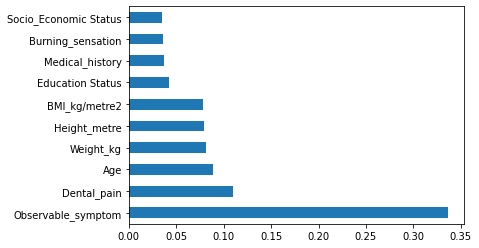

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [14]:
X=X.drop(['Exposure_in_yr'],axis=1)
X=X.drop(['Frequency_day'],axis=1)
X=X.drop(['Sex'],axis=1)
X=X.drop(['Oral_Habits'],axis=1)
X=X.drop(['Dietary_Habits'],axis=1)
X=X.drop(['Spicy/Non_Spicy'],axis=1)

### Standardisation of x label values

In [15]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [16]:
X.shape

(388, 10)

## Model Implementation

### Random Forests

In [17]:
d_trees = np.arange(1, 200)
train_accuracy = np.empty(len(d_trees))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
for i in (d_trees):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    y_pred = rfc.predict(X_test)
    #metrics.accuracy_score(b_test, y_pred)
    train_accuracy[i-1] = metrics.accuracy_score(y_test, y_pred)

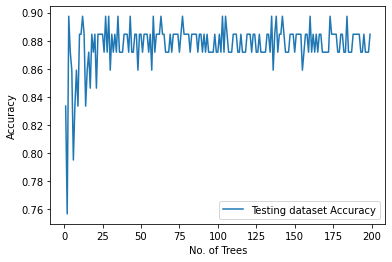

In [18]:
plt.plot(d_trees,train_accuracy, label = 'Testing dataset Accuracy')

 
plt.legend()
plt.xlabel('No. of Trees')
plt.ylabel('Accuracy')

plt.show()

In [27]:
clf = RandomForestClassifier(random_state=4)

In [28]:
score_rf=cross_val_score(clf,X, y,cv=5)
print(score_rf)
print('avg',np.average(score_rf))

[0.76923077 0.85897436 0.87179487 0.88311688 0.83116883]
avg 0.8428571428571429


### Bagging

In [29]:
bg = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=1.0,random_state=2)

In [30]:
score_rf_=cross_val_score(bg,X, y,cv=5)
print(score_rf_)
print('avg',np.average(score_rf_))

[0.58974359 0.83333333 0.82051282 0.87012987 0.81818182]
avg 0.7863802863802863


### Adaboost

In [31]:
ad = AdaBoostClassifier(RandomForestClassifier(),learning_rate=0.01,random_state=4)

In [32]:
scorerf_=cross_val_score(ad,X, y,cv=5)
print(scorerf_)
print('avg',np.average(scorerf_))

[0.71794872 0.85897436 0.87179487 0.88311688 0.85714286]
avg 0.8377955377955377


### Gradient Boosting

In [33]:
model = GradientBoostingClassifier(random_state=6)

In [34]:
scoe_rf_=cross_val_score(model,X, y,cv=5)
print(scoe_rf_)
print('avg',np.average(scoe_rf_))

[0.8974359  0.84615385 0.88461538 0.88311688 0.85714286]
avg 0.8736929736929737


### SVM

In [35]:
clf= SVC(kernel='linear',probability=True,random_state=1)

In [36]:
sore_r_f_=cross_val_score(clf,X, y,cv=5)
print(sore_r_f_)
print('avg',np.average(sore_r_f_))

[0.85897436 0.8974359  0.93589744 0.90909091 0.85714286]
avg 0.8917082917082917


### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [38]:
modol = KNeighborsClassifier()

In [39]:
ore_r_f_=cross_val_score(modol,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

[0.70512821 0.82051282 0.85897436 0.88311688 0.88311688]
avg 0.8301698301698301


### ANN

In [40]:
clf_ = MLPClassifier(hidden_layer_sizes=(6,6),
                    max_iter = 60,
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [41]:
ore_r_f_=cross_val_score(clf_,X, y,cv=5)
print(ore_r_f_)
print('avg',np.average(ore_r_f_))

Iteration 1, loss = 0.60373301
Iteration 2, loss = 0.57685263
Iteration 3, loss = 0.55316116
Iteration 4, loss = 0.53311845
Iteration 5, loss = 0.51321278
Iteration 6, loss = 0.49305788
Iteration 7, loss = 0.47138585
Iteration 8, loss = 0.45041472
Iteration 9, loss = 0.42757542
Iteration 10, loss = 0.40321514
Iteration 11, loss = 0.38023079
Iteration 12, loss = 0.35969824
Iteration 13, loss = 0.34148419
Iteration 14, loss = 0.32804609
Iteration 15, loss = 0.31593281
Iteration 16, loss = 0.30170548
Iteration 17, loss = 0.29197637
Iteration 18, loss = 0.28303012
Iteration 19, loss = 0.27616223
Iteration 20, loss = 0.27179414
Iteration 21, loss = 0.26702028
Iteration 22, loss = 0.26420898
Iteration 23, loss = 0.26164053
Iteration 24, loss = 0.25967059
Iteration 25, loss = 0.25791500
Iteration 26, loss = 0.25606904
Iteration 27, loss = 0.25485472
Iteration 28, loss = 0.25301335
Iteration 29, loss = 0.25205763
Iteration 30, loss = 0.25028385
Iteration 31, loss = 0.24942531
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 54, loss = 0.21601117
Iteration 55, loss = 0.21428943
Iteration 56, loss = 0.21330747
Iteration 57, loss = 0.21187335
Iteration 58, loss = 0.21121258
Iteration 59, loss = 0.21016996
Iteration 60, loss = 0.20893669
Iteration 1, loss = 0.64660650
Iteration 2, loss = 0.61419811
Iteration 3, loss = 0.58697981
Iteration 4, loss = 0.56545232
Iteration 5, loss = 0.54463451
Iteration 6, loss = 0.52495261
Iteration 7, loss = 0.50568037
Iteration 8, loss = 0.48764054
Iteration 9, loss = 0.46837520
Iteration 10, loss = 0.44883714
Iteration 11, loss = 0.43027613
Iteration 12, loss = 0.41163456
Iteration 13, loss = 0.39505117
Iteration 14, loss = 0.37818393
Iteration 15, loss = 0.36374665
Iteration 16, loss = 0.34861707
Iteration 17, loss = 0.33580919
Iteration 18, loss = 0.32364931
Iteration 19, loss = 0.31215768
Iteration 20, loss = 0.30272978
Iteration 21, loss = 0.29254205
Iteration 22, loss = 0.28594840
Iteration 23, loss = 0.27931266
Iteration 24, loss = 0.27447410
Iteration 25, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Iteration 37, loss = 0.23512075
Iteration 38, loss = 0.23439086
Iteration 39, loss = 0.23346283
Iteration 40, loss = 0.23271603
Iteration 41, loss = 0.23204383
Iteration 42, loss = 0.23136773
Iteration 43, loss = 0.23085485
Iteration 44, loss = 0.23003951
Iteration 45, loss = 0.22961859
Iteration 46, loss = 0.22885650
Iteration 47, loss = 0.22857852
Iteration 48, loss = 0.22711842
Iteration 49, loss = 0.22637838
Iteration 50, loss = 0.22564930
Iteration 51, loss = 0.22469816
Iteration 52, loss = 0.22393039
Iteration 53, loss = 0.22277720
Iteration 54, loss = 0.22198288
Iteration 55, loss = 0.22166061
Iteration 56, loss = 0.22058879
Iteration 57, loss = 0.22004214
Iteration 58, loss = 0.21954922
Iteration 59, loss = 0.21927373
Iteration 60, loss = 0.21912482
Iteration 1, loss = 0.64094962
Iteration 2, loss = 0.60753292
Iteration 3, loss = 0.58064302
Iteration 4, loss = 0.55763562
Iteration 5, loss = 0.53620768
Iteration 6, loss = 0.51729834
Iteration 7, loss = 0.49942758
Iteration 8, lo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
